
# Test with IMGs and arrays


### JAH, April 2021

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import matplotlib.pyplot as plt

import clouds.clouds    as clouds
import clouds.pltclouds as pltclouds
import clouds.ridges    as ridges

In [3]:
import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Tue Apr 27 18:58:41 2021


### Using Functions

In [4]:
def img_reverse(image, value = 0.):
    shape = list(image.shape)
    shape.reverse()
    rimage = np.full(shape, value)
    for i in range(shape[0]):
        rimage[i, :] = image[:, i]
    return rimage

In [5]:
fun = lambda x, y : (y - x)**2

scale = 2
nx = scale * 6
ny = scale * 11

xs = np.linspace(0., nx-1, nx)
ys = np.linspace(0., ny-1, ny)

xcs = 0.5*(xs[1:] + xs[:-1])
ycs = 0.5*(ys[1:] + ys[:-1])

xms    = np.full( (nx-1, ny-1), 0.)
yms    = np.full( (nx-1, ny-1), 0.)
counts = np.full( (nx-1, ny-1), 0.)

for i, xc in enumerate(xcs):
    xms[i, :]    = xc
    yms[i, :]    = ycs
    counts[i, :] = fun(xc, ycs)

0 8 0.5 8.5 64.0 64.0
ok  True
1 5 1.5 5.5 16.0 16.0
ok  True


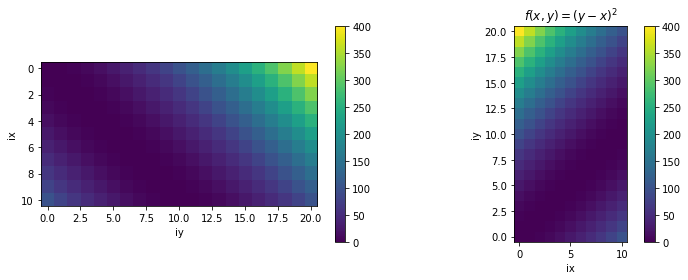

In [6]:
def _test(ix, iy, arr, afun, xcs, ycs):
    print(ix, iy, xcs[ix], ycs[iy], arr[ix, iy], afun(xcs[ix], ycs[iy]))
    print('ok ', arr[ix, iy] == afun(xcs[ix], ycs[iy]))

def _view(arr, title = ''):

    plt.figure(figsize = (2 *5, 1 * 4))

    plt.subplot(1, 2, 1)
    plt.imshow(arr)
    plt.colorbar();
    plt.ylabel('ix'); plt.xlabel('iy');

    plt.subplot(1, 2, 2)
    plt.imshow(arr.T, origin = 'lower')
    plt.colorbar();
    plt.ylabel('iy'); plt.xlabel('ix');
    
    plt.title(title)
    plt.tight_layout()


_view(counts, r'$f(x,y) = (y-x)^2$')
_test(0, 8, counts, fun, xcs, ycs)
_test(1, 5, counts, fun, xcs, ycs)

**Notice**: 

   * Images (matrices) by default put the origin on the left-up corner, reversing the axis (x, y)

#### Test gradients

2 8 2.5 8.5 -12.0 -12.0
ok  True
2 8 2.5 8.5 12.0 12.0
ok  True


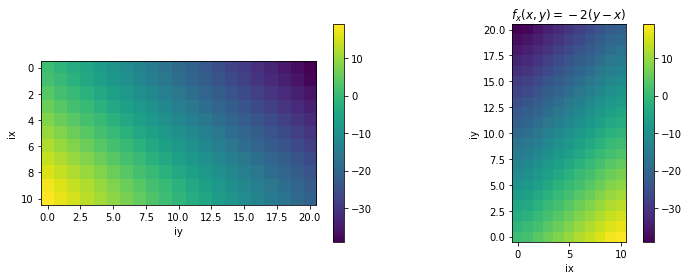

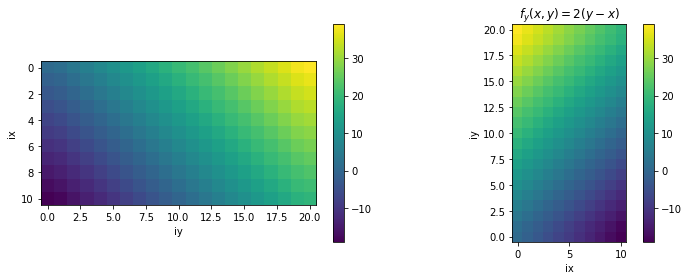

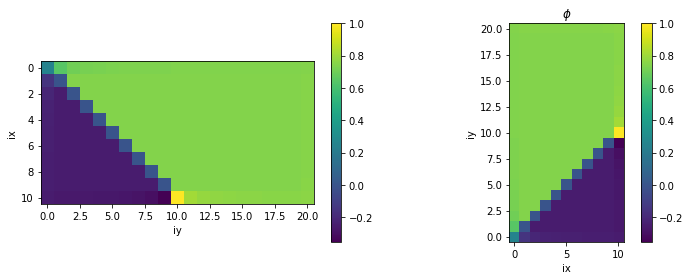

In [7]:
lx, ly = np.gradient(counts)
phi    = np.arctan2(ly, lx)/np.pi

dlx = lambda x, y : - 2 * (y - x)
dly = lambda x, y :   2 * (y - x)

_view(lx, r'$f_x(x, y) = -2 (y-x) $')
_view(ly, r'$f_y(x, y) = 2 (y-x)$')
_view(phi, r'$\phi$')

ix, iy = 2, 8
_test(ix, iy, lx, dlx, xcs, ycs)
_test(ix, iy, ly, dly, xcs, ycs)



#### Test Hessian

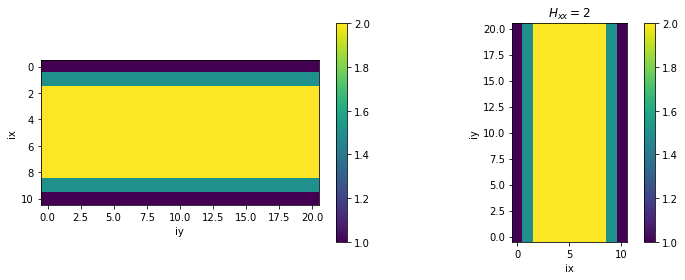

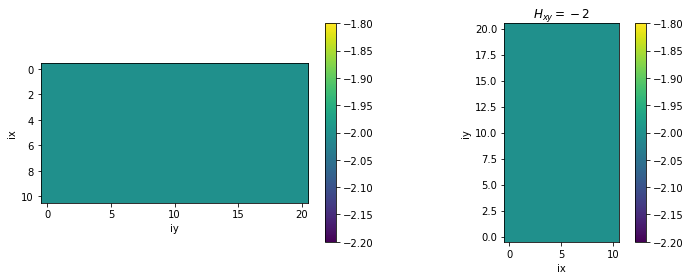

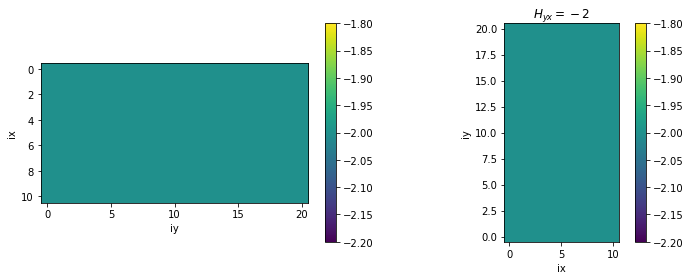

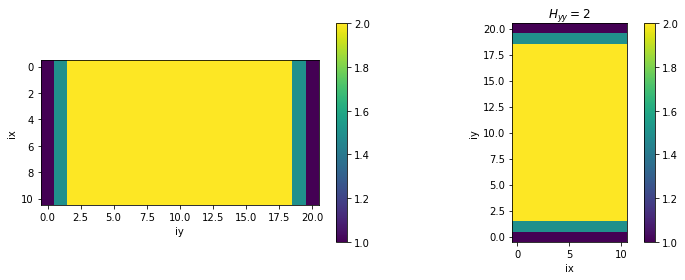

In [8]:
hess = ridges.hessian(counts)
hxx, hxy, hyx, hyy = hess[0, 0, :, :], hess[0, 1, :, :], hess[1, 0, :, :], hess[1, 1, :, :]

_view(hxx, r'$H_{xx} = 2$')
_view(hxy, r'$H_{xy} = -2$')
_view(hyx, r'$H_{yx} = -2$')
_view(hyy, r'$H_{yy} = 2$')

**Note**

   * There is border effects computing the Hessian

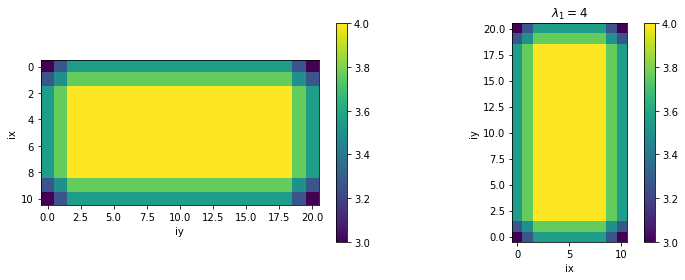

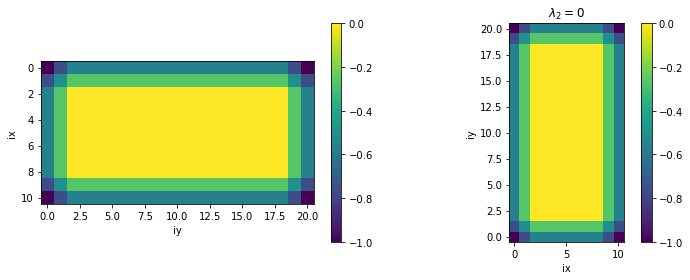

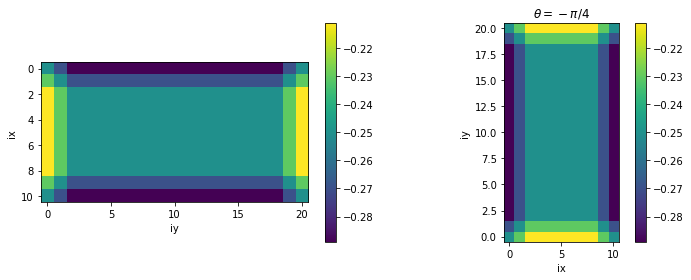

In [9]:
i1, i2, theta = ridges.hess2d_eigvals(hess)
_view(i1   , r'$\lambda_1 = 4$')
_view(i2   , r'$\lambda_2 = 0$')
_view(theta, r'$\theta = -\pi/4$')

##  Histogram

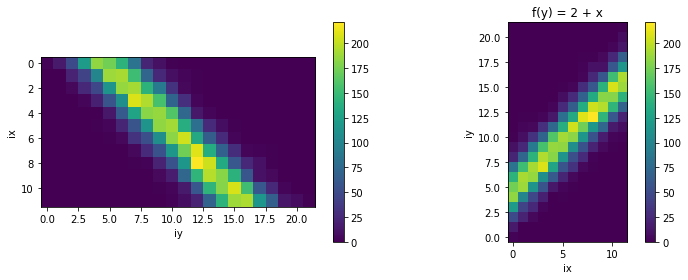

In [10]:
size  = 10000
sigma = 1.5
xs =        (nx - 1) * np.random.uniform(size = size)
ys = 2 +  xs + sigma * np.random.normal(size = size)

counts, xedges, yedges = np.histogram2d(xs, ys, (nx, ny))

xcs = 0.5 * (xedges[1:] + xedges[:-1])
ycs = 0.5 * (yedges[1:] + yedges[:-1])

_view(counts, 'f(y) = 2 + x')
#plt.scatter(xs, ys, alpha = 0.1);

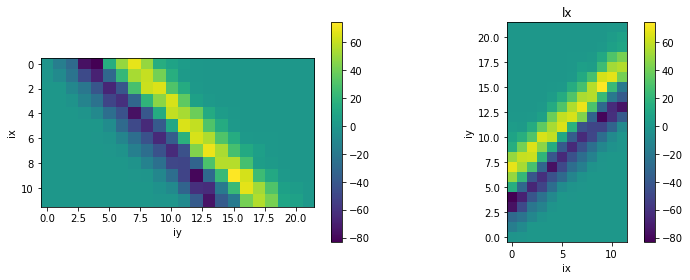

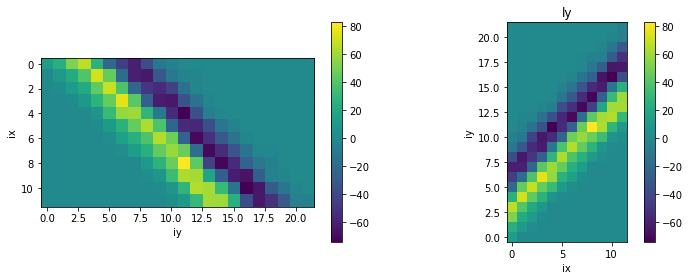

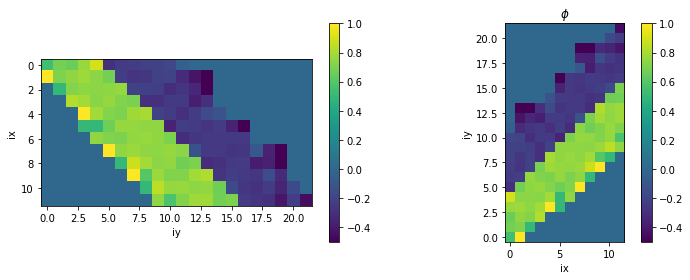

In [11]:
lx , ly  = np.gradient(counts)
phi      = np.arctan2(ly, lx)/np.pi

_view(lx, 'lx')
_view(ly, 'ly')
_view(phi, r'$\phi$')

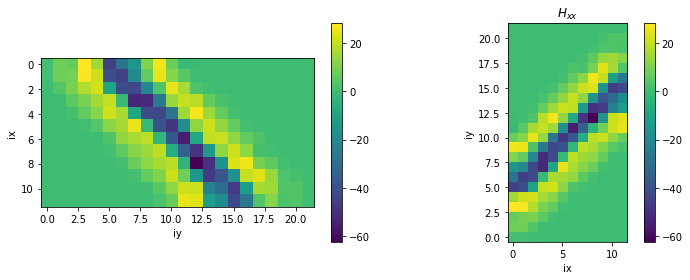

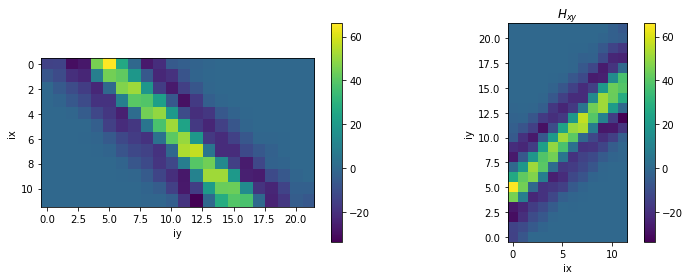

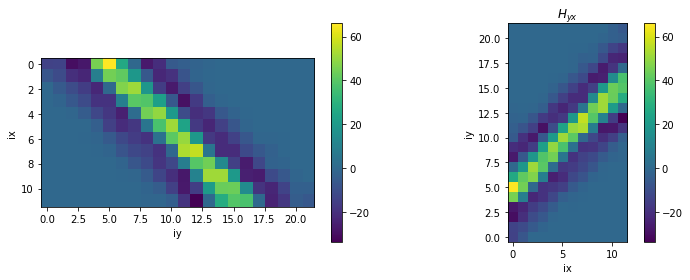

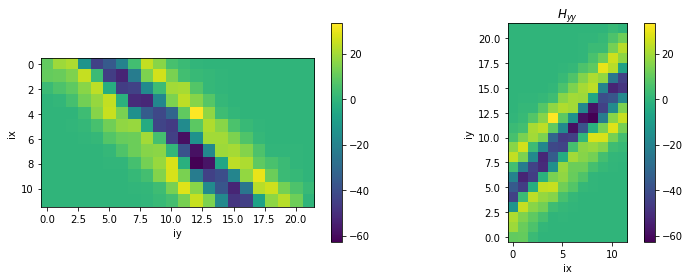

In [12]:
hess = ridges.hessian(counts)
hxx, hxy, hyx, hyy = hess[0, 0, :, :], hess[0, 1, :, :], hess[1, 0, :, :], hess[1, 1, :, :]

_view(hxx, r'$H_{xx}$')
_view(hxy, r'$H_{xy}$')
_view(hyx, r'$H_{yx}$')
_view(hyy, r'$H_{yy}$')

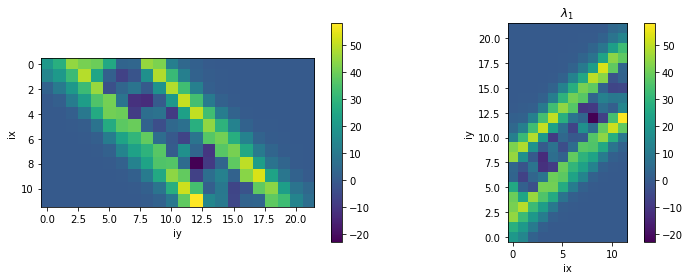

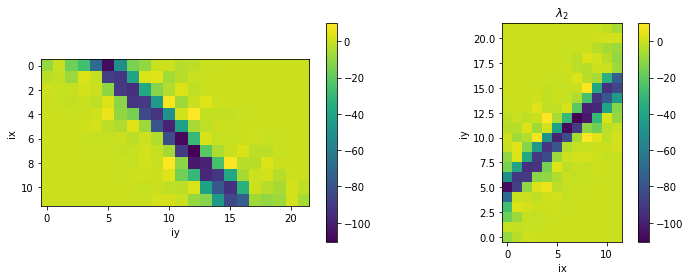

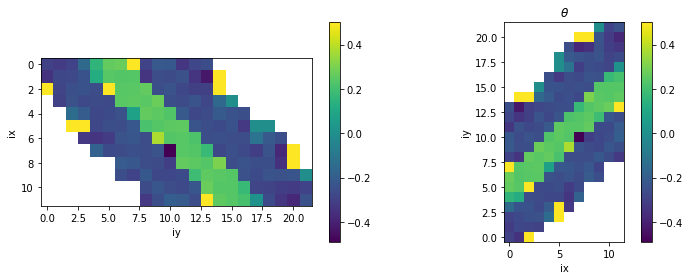

In [13]:
i1, i2, theta = ridges.hess2d_eigvals(hess)
_view(i1   , r'$\lambda_1$')
_view(i2   , r'$\lambda_2$')
_view(theta, r'$\theta$')